<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter8/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.13


# AdaBoost
## Import modules

In [2]:
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import matplotlib.pyplot as plt
print(np.__version__)

1.21.5


## Set random seed

In [3]:
np.random.seed(100)

## Original Program

In [4]:
def ExponentialLoss(y,yhat):
    n = len(y)
    loss = 0
    for i in range(n):
        loss = loss+np.exp(-y[i]*yhat[i])
    loss = loss/n
    return loss

n_points = 100 # points
x, y =  make_blobs(n_samples=n_points, n_features=5,  centers=2,
                      cluster_std=20.0, random_state=100)
y[y==0]=-1  

# AdaBoost implementation
BoostingRounds = 1000
n = len(x)
W = 1/n*np.ones(n)

Learner = []
alpha_b_arr = []

for i in range(BoostingRounds):
    clf = DecisionTreeClassifier(max_depth=1)
    clf.fit(x,y, sample_weight=W)
    
    Learner.append(clf)
    
    train_pred = clf.predict(x)
    err_b = 0
    for i in range(n):
        if(train_pred[i]!=y[i]):
            err_b = err_b+W[i]
    err_b = err_b/np.sum(W)
        
    alpha_b = 0.5*np.log((1-err_b)/err_b)
    
    alpha_b_arr.append(alpha_b)
    
    for i in range(n):
        W[i] = W[i]*np.exp(-y[i]*alpha_b*train_pred[i])        
    
yhat_boost = np.zeros(len(y))

for j in range(BoostingRounds):
    yhat_boost = yhat_boost+alpha_b_arr[j]*Learner[j].predict(x)
    
    
yhat = np.zeros(n)
yhat[yhat_boost>=0]=1
yhat[yhat_boost<0]=-1
print("AdaBoost Classifier exponential loss = ", ExponentialLoss(y, yhat_boost)) 
print("AdaBoost Classifier zero-one loss = ", zero_one_loss(y,yhat) ) 

AdaBoost Classifier exponential loss =  0.004224013663777135
AdaBoost Classifier zero-one loss =  0.0


## Reproduce Figure 8.11

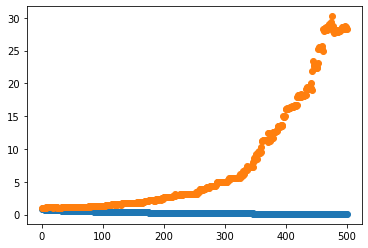

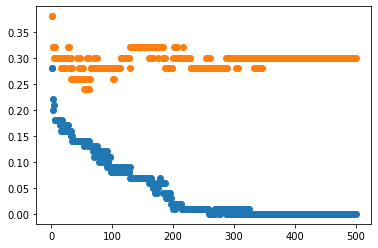

In [5]:
n_points = 100 # points
X, Y =  make_blobs(n_samples=n_points+50, n_features=5,  centers=2,
                      cluster_std=20.0, random_state=100)

#Y[Y==0]=-1

x = np.copy(X[0:n_points])
y = np.copy(Y[0:n_points])
y[y==0]=-1

x_test = np.copy(X[n_points:])
y_test = np.copy(Y[n_points:])
y_test[y_test==0]=-1

# AdaBoost implementation
BoostingRounds = 500
BB = np.arange(BoostingRounds)+1
n = len(x)
W = 1/n*np.ones(n)

Learner = []
alpha_b_arr = []

ypre_exp = np.zeros(BoostingRounds)
ypre_01 = np.zeros(BoostingRounds)
ytest_exp = np.zeros(BoostingRounds)
ytest_01 = np.zeros(BoostingRounds)


yhat_boost1 = np.zeros(len(y))
yhat_boost2 = np.zeros(len(y_test))


for i in range(BoostingRounds):
    clf = DecisionTreeClassifier(max_depth=1)
    clf.fit(x,y, sample_weight=W)
    
    Learner.append(clf)
    
    train_pred = clf.predict(x)
    err_b = 0
    for j in range(n):
        if(train_pred[j]!=y[j]):
            err_b = err_b+W[j]
    err_b = err_b/np.sum(W)
        
    alpha_b = 0.5*np.log((1-err_b)/err_b)
    
    alpha_b_arr.append(alpha_b)
    
    for j in range(n):
        W[j] = W[j]*np.exp(-y[j]*alpha_b*train_pred[j])        

    yhat_boost1 = yhat_boost1+alpha_b_arr[i]*Learner[i].predict(x)
    yhat = np.zeros(n)
    yhat[yhat_boost1>=0]=1
    yhat[yhat_boost1<0]=-1
    ypre_exp[i] = ExponentialLoss(y, yhat_boost1)
    ypre_01[i] = zero_one_loss(y,yhat)

    yhat_boost2 = yhat_boost2+alpha_b_arr[i]*Learner[i].predict(x_test)
    yhat = np.zeros(len(y_test))
    yhat[yhat_boost2>=0]=1
    yhat[yhat_boost2<0]=-1
    ytest_exp[i] = ExponentialLoss(y_test, yhat_boost2)
    ytest_01[i] = zero_one_loss(y_test,yhat)
   



plt.scatter(BB, ypre_exp)
plt.scatter(BB, ytest_exp)
plt.show()
plt.scatter(BB, ypre_01)
plt.scatter(BB, ytest_01)
plt.show()

## Compare with sklearn implement

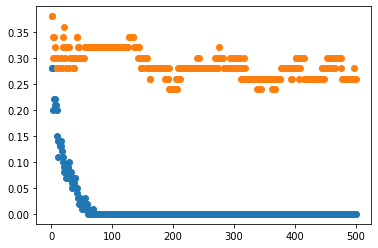

In [6]:
yhat_boost3 = np.zeros(len(y))
yhat_boost4 = np.zeros(len(y_test))
ypre_sklearn_01 = np.zeros(BoostingRounds)
ytest_sklearn_01 = np.zeros(BoostingRounds)

for i in range(BoostingRounds):
    clf2 = AdaBoostClassifier(n_estimators=i+1, random_state=0)
    clf2.fit(x, y)
    yhat_boost3 = clf2.predict(x)
    ypre_sklearn_01[i] = zero_one_loss(y,yhat_boost3)

    yhat_boost4 = clf2.predict(x_test)
    ytest_sklearn_01[i] = zero_one_loss(y_test,yhat_boost4)

plt.scatter(BB, ypre_sklearn_01)
plt.scatter(BB, ytest_sklearn_01)
plt.show()